In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_01_28_order_book_final.csv'
data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
data_book_28 = data1[['0','1','2','3']]

In [28]:
data_book_28_open = data_book_28[213*4-3:67229*4+1]
data_book_28_open = data_book_28_open.reset_index(drop = True)

In [29]:
data_book_28_open[0:1]

,0,1,2,3
0,TimeStamp,08:59:58.780335000,NaN,NaN


In [43]:
data = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.01.28.csv'
data = pd.read_csv(datapath)
data_CNF14 = data[data.Series == 'CNF14']
data = data_CNF14
market_open_time = data[data['TimeStamp'].str.contains('2014-01-28D09:00')].index.tolist()[0] 
market_close_time = data[data['TimeStamp'].str.contains('2014-01-28D16:00')].index.tolist()[0] 
data_open = data[market_open_time:market_close_time+1]
data_open.loc[data_open.BidOrAsk == 'A',['Trade']] = ' '
data_open['Price'][data_open.Trade == ' '] = 0
data_open = data_open.loc[data_open.groupby('TimeStamp')["Price"].idxmin()]
data_trade = data_open[['TimeStamp','Price','Trade']].reset_index(drop = True)

/home/bigdatas16/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
import time 
start = time.time()
Bid1 = []
Bid2 = []
Bid3 = []
Bid1_Quantity = []
Bid2_Quantity = []
Bid3_Quantity = []
Ask1 = []
Ask2 = []
Ask3 = []
Ask1_Quantity = []
Ask2_Quantity = []
Ask3_Quantity = []

TimeStamp = []
for i in range(1,len(data_book_28_open),4):
    #print data_book_28_open.iloc[i]['0']
    #print data_book_28_open.iloc[i]['2']
    Bid1.append(float(data_book_28_open.iloc[i]['0'])/100.0)
    Bid1_Quantity.append(float(data_book_28_open.iloc[i]['1']))
    
    Bid2.append(float(data_book_28_open.iloc[i + 1]['0'])/100.0)
    Bid2_Quantity.append(float(data_book_28_open.iloc[i + 1]['1']))  
    
    Bid3.append(float(data_book_28_open.iloc[i + 2]['0'])/100.0)
    Bid3_Quantity.append(float(data_book_28_open.iloc[i + 2]['1']))  
    
    Ask1.append(float(data_book_28_open.iloc[i]['2'])/100.0) 
    Ask1_Quantity.append(float(data_book_28_open.iloc[i]['3']))
    
    Ask2.append(float(data_book_28_open.iloc[i + 1]['2'])/100.0) 
    Ask2_Quantity.append(float(data_book_28_open.iloc[i + 1]['3']))    
    
    Ask3.append(float(data_book_28_open.iloc[i + 2]['2'])/100.0) 
    Ask3_Quantity.append(float(data_book_28_open.iloc[i + 2]['3']))    
    TimeStamp.append(data_book_28_open.iloc[i-1][1])
    
    
end = time.time()  
print "Total time = %f"%(end - start)  

Total time = 151.542252


In [6]:
data_trade = data_trade.reset_index(drop = True)
data_trade_time_series_0900_0930 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D09:30')].index.tolist()[0]
data_trade_time_series_0930_1000 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D10:00')].index.tolist()[0]
data_trade_time_series_1000_1030 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D10:30')].index.tolist()[0]
data_trade_time_series_1030_1100 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D11:00')].index.tolist()[0]
data_trade_time_series_1100_1130 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D11:30')].index.tolist()[0]
data_trade_time_series_1130_1200 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D12:00')].index.tolist()[0]
data_trade_time_series_1200_1230 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D12:30')].index.tolist()[0]

data_trade_time_series_1230_1300 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D13:00')].index.tolist()[0]
data_trade_time_series_1300_1330 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D13:30')].index.tolist()[0]
data_trade_time_series_1330_1400 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D14:00')].index.tolist()[0]
data_trade_time_series_1400_1430 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D14:30')].index.tolist()[0]
data_trade_time_series_1430_1500 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D15:00')].index.tolist()[0]
data_trade_time_series_1500_1530 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D15:30')].index.tolist()[0]
data_trade_time_series_1530_1600 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-28D16:00')].index.tolist()[0]

In [7]:
import time 
start = time.time()
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,67017,1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,67017,1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 302.767006


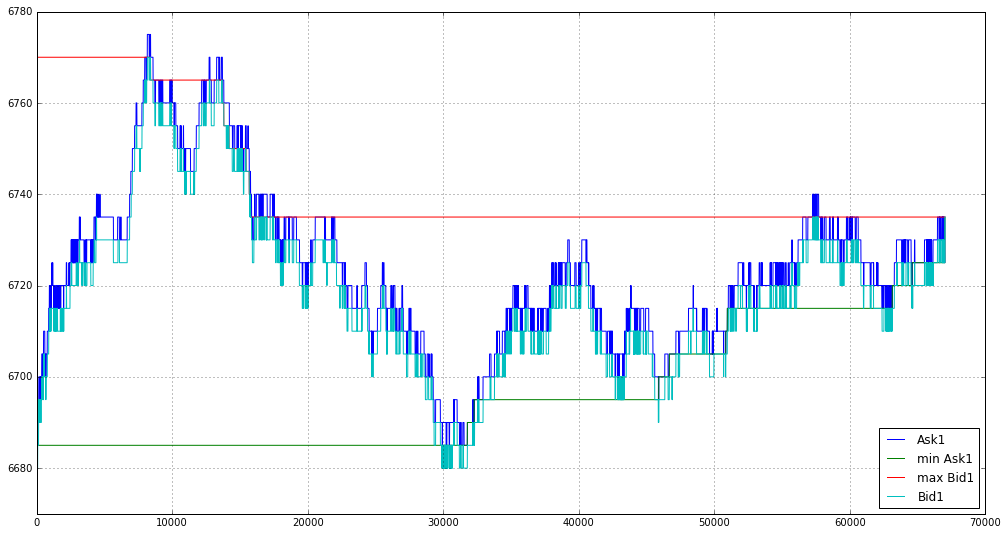

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,9))
plt.grid()
plot(Ask1[0:67017],label = 'Ask1')
#plot(Ask2[0:data_trade_time_series_0900_0930],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_0900_0930],label = 'Ask3')
plot(min_Ask1_time_series[0:data_trade_time_series_1530_1600],label = 'min Ask1')
plot(max_Bid1_time_series[0:data_trade_time_series_1530_1600],label = 'max Bid1')

plot(Bid1[0:data_trade_time_series_1530_1600],label = 'Bid1')
#plot(Bid2[0:data_trade_time_series_0900_0930],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_0900_0930],label = 'Bid3')
plt.ylim(6670,6780)
plt.legend(loc = 4)

In [44]:
data_trade_timestamp = data_trade.TimeStamp

In [131]:
data_trade_timestamp[10000],data_trade_timestamp[20000],data_trade_timestamp[30000],data_trade_timestamp[40000],\
data_trade_timestamp[50000],data_trade_timestamp[60000],data_trade_timestamp[67000]

('2014-01-28D09:39:35.436870600',
 '2014-01-28D10:01:03.577450200',
 '2014-01-28D10:31:19.288705800',
 '2014-01-28D11:16:46.697016000',
 '2014-01-28D13:42:52.194159700',
 '2014-01-28D14:32:57.501904900',
 '2014-01-28D15:55:37.390457700')

In [46]:
Ask1[201]

6700.0

In [123]:
data_trade_timestamp[20000]

'2014-01-28D10:01:03.577450200'

In [50]:
len(data_trade_timestamp),len(Ask1)

(67017, 67017)

In [52]:
data_trade_timestamp[200],data_trade_timestamp[200+29121]

('2014-01-28D09:01:27.049279000', '2014-01-28D10:29:58.230677800')

In [62]:
time_start = data_trade_timestamp[200]
time_traded = data_trade_timestamp[200+29121]

In [69]:
hour = float(time_traded[11])*3600 - float(time_start[11])*3600

3600.0

In [64]:
hour = float(time_traded[12])*3600 - float(time_start[12])*3600

'9'

In [ ]:
if time_traded[11] - time_start[11] > 0

In [84]:
time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                   + float(time_traded[14])*600 + float(time_traded[15])*60\
                   + float(time_traded[17])*10 + float(time_traded[18])

In [82]:
time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                  + float(time_start[14])*600 + float(time_start[15])*60\
                  + float(time_start[17])*10 + float(time_start[18])

In [86]:
time_traded_second - time_start_second

5311.0

In [135]:
#2014-01-28 close price = 6750
#0.6177
#0.8696
#1.0678
#1.3835
def bid_stat_time_spread_divid(Bid1,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price):
    
    Bid1_traded_spr5_category_one = 0
    Bid1_traded_expected_spr5_category_one = 0
    Bid1_traded_spr10_category_one = 0
    Bid1_traded_expected_spr10_category_one = 0
    N_spr5_category_one = 0
    N_spr10_category_one = 0
    MDD_traded_spr5_category_one = 0
    MDD_traded_spr10_category_one = 0
    traded_time_spr5_category_one = 0
    traded_time_spr10_category_one = 0
    
    Bid1_traded_spr5_category_two = 0
    Bid1_traded_expected_spr5_category_two = 0
    Bid1_traded_spr10_category_two = 0
    Bid1_traded_expected_spr10_category_two = 0
    N_spr5_category_two = 0
    N_spr10_category_two = 0
    MDD_traded_spr5_category_two = 0
    MDD_traded_spr10_category_two = 0
    traded_time_spr5_category_two = 0
    traded_time_spr10_category_two = 0
    
    Bid1_traded_spr5_category_three = 0
    Bid1_traded_expected_spr5_category_three = 0
    Bid1_traded_spr10_category_three = 0
    Bid1_traded_expected_spr10_category_three = 0
    N_spr5_category_three = 0
    N_spr10_category_three = 0
    MDD_traded_spr5_category_three = 0
    MDD_traded_spr10_category_three = 0
    traded_time_spr5_category_three = 0
    traded_time_spr10_category_three = 0
    
    Bid1_traded_spr5_category_four = 0
    Bid1_traded_expected_spr5_category_four = 0
    Bid1_traded_spr10_category_four = 0
    Bid1_traded_expected_spr10_category_four = 0
    N_spr5_category_four = 0
    N_spr10_category_four = 0
    MDD_traded_spr5_category_four = 0
    MDD_traded_spr10_category_four = 0
    traded_time_spr5_category_four = 0
    traded_time_spr10_category_four = 0
    
    Bid1_traded_spr5_category_five = 0
    Bid1_traded_expected_spr5_category_five = 0
    Bid1_traded_spr10_category_five = 0
    Bid1_traded_expected_spr10_category_five = 0
    N_spr5_category_five = 0
    N_spr10_category_five = 0
    MDD_traded_spr5_category_five = 0
    MDD_traded_spr10_category_five = 0    
    traded_time_spr5_category_five = 0
    traded_time_spr10_category_five = 0    
    
    ###one week
    divid_weighted_five_categories = divid_weighted_five_category(Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weight1,weight2,weight3)

    print divid_weighted_five_categories

    for i in range(0,data_trade_time_series_1530_1600,1):
        #print i
        #print Bid1[i]
        #print min_Ask1_time_series[i+1]
        weighted_Bid = Bid1_Quantity[i] * weight1 + Bid2_Quantity[i] * weight2 + Bid3_Quantity[i] * weight3
        weighted_Ask = Ask1_Quantity[i] * weight1 + Ask2_Quantity[i] * weight2 + Ask3_Quantity[i] * weight3  
        #print weighted_Bid
        #print weighted_Ask
        #print (weighted_Bid*(1.0) / weighted_Ask)
        #print '\t'
        if (weighted_Bid*(1.0) / weighted_Ask) <= divid_weighted_five_categories[0]:  
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_one = N_spr5_category_one + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_one = Bid1_traded_spr5_category_one + 1
                    Bid1_traded_expected_spr5_category_one = Bid1_traded_expected_spr5_category_one + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_one = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_one 
                    #print MDD_traded_spr5_category_one
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_one = traded_time_spr5_category_one + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_one
                    
                else:
                    Bid1_traded_expected_spr5_category_one = Bid1_traded_expected_spr5_category_one + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_one = N_spr10_category_one + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr10_category_one = Bid1_traded_spr10_category_one + 1
                    Bid1_traded_expected_spr10_category_one = Bid1_traded_expected_spr10_category_one + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_one = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_one
                    #print MDD_traded_spr10_category_one
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_one = traded_time_spr10_category_one + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_one
                else:
                    Bid1_traded_expected_spr10_category_one = Bid1_traded_expected_spr10_category_one + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
            else:
                pass

        elif divid_weighted_five_categories[0] < (weighted_Bid*(1.0) / weighted_Ask) <= divid_weighted_five_categories[1]:
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_two = N_spr5_category_two + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_two = Bid1_traded_spr5_category_two + 1
                    Bid1_traded_expected_spr5_category_two = Bid1_traded_expected_spr5_category_two + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_two = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_two 
                    #print MDD_traded_spr5_category_two              
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_two = traded_time_spr5_category_two + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_two
                    
                else:
                    Bid1_traded_expected_spr5_category_two = Bid1_traded_expected_spr5_category_two + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_two = N_spr10_category_two + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr10_category_two = Bid1_traded_spr10_category_two + 1
                    Bid1_traded_expected_spr10_category_two = Bid1_traded_expected_spr10_category_two + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_two = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_two 
                    #print MDD_traded_spr10_category_two                 
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_two = traded_time_spr10_category_two + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_two
                else:
                    Bid1_traded_expected_spr10_category_two = Bid1_traded_expected_spr10_category_two + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
            else:
                pass    

        elif divid_weighted_five_categories[1] < (weighted_Bid*(1.0) / weighted_Ask) <= divid_weighted_five_categories[2]:
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_three = N_spr5_category_three + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_three = Bid1_traded_spr5_category_three + 1
                    Bid1_traded_expected_spr5_category_three = Bid1_traded_expected_spr5_category_three + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_three = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_three 
                    #print MDD_traded_spr5_category_three    
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_three = traded_time_spr5_category_three + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_three
                    
                else:
                    Bid1_traded_expected_spr5_category_three = Bid1_traded_expected_spr5_category_three + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_three = N_spr10_category_three + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1[i]
                    #print Ask1[i]
                    Bid1_traded_spr10_category_three = Bid1_traded_spr10_category_three + 1
                    Bid1_traded_expected_spr10_category_three = Bid1_traded_expected_spr10_category_three + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_three = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_three 
                    #print MDD_traded_spr10_category_three               
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_three = traded_time_spr10_category_three + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_three
                else:
                    Bid1_traded_expected_spr10_category_three = Bid1_traded_expected_spr10_category_three + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print 'a2 = %f'%(Bid1_traded_expected_spr10_category_three)
            else:
                pass    

        elif divid_weighted_five_categories[2] < (weighted_Bid*(1.0) / weighted_Ask) <= divid_weighted_five_categories[3]:
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_four = N_spr5_category_four + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_four = Bid1_traded_spr5_category_four + 1
                    Bid1_traded_expected_spr5_category_four = Bid1_traded_expected_spr5_category_four + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_four = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_four 
                    #print MDD_traded_spr5_category_four
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_four = traded_time_spr5_category_four + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_four
                else:
                    Bid1_traded_expected_spr5_category_four = Bid1_traded_expected_spr5_category_four + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_four = N_spr10_category_four + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1[i]
                    #print Ask1[i]
                    Bid1_traded_spr10_category_four = Bid1_traded_spr10_category_four + 1
                    Bid1_traded_expected_spr10_category_four = Bid1_traded_expected_spr10_category_four + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_four = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_four 
                    #print MDD_traded_spr10_category_four 
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_four = traded_time_spr10_category_four + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_four
                else:
                    Bid1_traded_expected_spr10_category_four = Bid1_traded_expected_spr10_category_four + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print 'a2 = %f'%(Bid1_traded_expected_spr10_category_four)
            else:
                pass    

        elif divid_weighted_five_categories[3] < (weighted_Bid*(1.0) / weighted_Ask): 
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_five = N_spr5_category_five + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_five = Bid1_traded_spr5_category_five + 1
                    Bid1_traded_expected_spr5_category_five = Bid1_traded_expected_spr5_category_five + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_five = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_five 
                    #print MDD_traded_spr5_category_five
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_five = traded_time_spr5_category_five + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_five
                else:
                    Bid1_traded_expected_spr5_category_five = Bid1_traded_expected_spr5_category_five + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_five = N_spr10_category_five + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1[i]
                    #print Ask1[i]
                    Bid1_traded_spr10_category_five = Bid1_traded_spr10_category_five + 1
                    Bid1_traded_expected_spr10_category_five = Bid1_traded_expected_spr10_category_five + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    #print 'a1 = %f'%(Bid1_traded_expected_spr10_category_four)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_five = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_five 
                    #print MDD_traded_spr10_category_five 
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_five = traded_time_spr10_category_five + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_five
                else:
                    Bid1_traded_expected_spr10_category_five = Bid1_traded_expected_spr10_category_five + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print 'a2 = %f'%(Bid1_traded_expected_spr10_category_four)
            else:
                pass    


        #print Bid1_traded_expected_spr10_category_three

        if i == data_trade_time_series_0900_0930 - 1:  

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '09:00~09:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '09:00~09:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '09:00~09:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '09:00~09:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '09:00~09:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '09:00~09:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '09:00~09:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '09:00~09:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '09:00~09:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/N_spr5_category_two)
            print '09:00~09:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/N_spr5_category_two)
            print '09:00~09:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/N_spr10_category_two)
            print '09:00~09:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/N_spr10_category_two)
            print '09:00~09:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '09:00~09:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '09:00~09:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '09:00~09:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '09:00~09:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/N_spr5_category_three)
            print '09:00~09:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/N_spr5_category_three)
            print '09:00~09:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/N_spr10_category_three)
            print '09:00~09:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/N_spr10_category_three)
            print '09:00~09:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '09:00~09:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '09:00~09:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '09:00~09:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
           
            print '09:00~09:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/N_spr5_category_four)
            print '09:00~09:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/N_spr5_category_four)
            print '09:00~09:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/N_spr10_category_four)
            print '09:00~09:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/N_spr10_category_four)
            print '09:00~09:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '09:00~09:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '09:00~09:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '09:00~09:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '09:00~09:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/N_spr5_category_five)
            print '09:00~09:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/N_spr5_category_five)
            print '09:00~09:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/N_spr10_category_five)
            print '09:00~09:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/N_spr10_category_five)
            print '09:00~09:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '09:00~09:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '09:00~09:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '09:00~09:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0           
            print '\t'        
            continue

        elif i == data_trade_time_series_0930_1000 - 1:   

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '09:30~10:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '09:30~10:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '09:30~10:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '09:30~10:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '09:30~10:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '09:30~10:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '09:30~10:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '09:30~10:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '09:30~10:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '09:30~10:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '09:30~10:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '09:30~10:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '09:30~10:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '09:30~10:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '09:30~10:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '09:30~10:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '09:30~10:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '09:30~10:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '09:30~10:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '09:30~10:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '09:30~10:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '09:30~10:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '09:30~10:00 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '09:30~10:00 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '09:30~10:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '09:30~10:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '09:30~10:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '09:30~10:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '09:30~10:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '09:30~10:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '09:30~10:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '09:30~10:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '09:30~10:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '09:30~10:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '09:30~10:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '09:30~10:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '09:30~10:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '09:30~10:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '09:30~10:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '09:30~10:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0        

            print '\t'        
            continue
        elif i == data_trade_time_series_1000_1030 - 1:

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '10:00~10:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '10:00~10:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '10:00~10:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '10:00~10:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '10:00~10:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '10:00~10:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '10:00~10:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '10:00~10:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '10:00~10:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '10:00~10:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '10:00~10:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '10:00~10:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '10:00~10:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '10:00~10:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '10:00~10:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '10:00~10:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '10:00~10:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '10:00~10:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '10:00~10:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '10:00~10:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '10:00~10:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '10:00~10:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '10:00~10:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '10:00~10:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
                      
            print '10:00~10:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '10:00~10:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '10:00~10:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '10:00~10:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '10:00~10:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '10:00~10:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '10:00~10:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '10:00~10:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '10:00~10:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '10:00~10:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '10:00~10:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '10:00~10:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '10:00~10:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '10:00~10:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '10:00~10:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '10:00~10:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0        
            print '\t'
            continue
        elif i == data_trade_time_series_1030_1100 - 1:

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '10:30~11:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '10:30~11:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '10:30~11:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '10:30~11:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '10:30~11:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '10:30~11:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '10:30~11:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '10:30~11:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '10:30~11:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '10:30~11:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '10:30~11:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '10:30~11:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '10:30~11:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '10:30~11:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '10:30~11:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '10:30~11:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '10:30~11:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '10:30~11:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '11:30~11:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '10:30~11:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '10:30~11:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '10:30~11:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '10:30~11:00 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '10:30~11:00 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
               
            print '10:30~11:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '10:30~11:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '10:30~11:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '10:30~11:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '10:30~11:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '10:30~11:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '10:30~11:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '10:30~11:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '10:30~11:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '10:30~11:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '10:30~11:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '10:30~11:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '10:30~11:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '10:30~11:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '10:30~11:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '10:30~11:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  
            print '\t'
            continue

        elif i == data_trade_time_series_1100_1130 - 1:

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '11:00~11:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '11:00~11:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '11:00~11:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '11:00~11:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '11:00~11:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '11:00~11:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '11:00~11:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '11:00~11:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '11:00~11:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '11:00~11:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '11:00~11:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '11:00~11:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '11:00~11:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '11:00~11:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '11:00~11:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '11:00~11:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '11:00~11:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '11:00~11:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '11:00~11:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '11:00~11:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '11:00~11:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '11:00~11:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '11:00~11:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '11:00~11:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
               
            print '11:00~11:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '11:00~11:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '11:00~11:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '11:00~11:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '11:00~11:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '11:00~11:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '11:00~11:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '11:00~11:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '11:00~11:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '11:00~11:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '11:00~11:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '11:00~11:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '11:00~11:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '11:00~11:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '11:00~11:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '11:00~11:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0          

            print '\t'
            continue

        elif i == data_trade_time_series_1130_1200 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '11:30~12:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '11:30~12:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '11:30~12:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '11:30~12:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '11:30~12:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '11:30~12:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '11:30~12:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '11:30~12:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '11:30~12:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '11:30~12:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '11:30~12:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '11:30~12:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '11:30~12:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '11:30~12:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '11:30~12:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '11:30~12:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '11:30~12:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '11:30~12:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '11:30~12:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '11:30~12:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '11:30~12:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '11:30~12:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '11:30~12:00 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '11:30~12:00 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '11:30~12:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '11:30~12:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '11:30~12:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '11:30~12:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '11:30~12:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '11:30~12:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '11:30~12:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '11:30~12:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '11:30~12:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '11:30~12:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '11:30~12:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '11:30~12:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '11:30~12:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '11:30~12:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '11:30~12:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '11:30~12:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0         

            print '\t'
            continue
        elif i == data_trade_time_series_1200_1230 - 1:

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '12:00~12:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '12:00~12:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '12:00~12:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '12:00~12:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '12:00~12:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '12:00~12:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '12:00~12:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '12:00~12:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '12:00~12:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '12:00~12:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '12:00~12:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '12:00~12:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '12:00~12:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '12:00~12:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '12:00~12:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '12:00~12:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '12:00~12:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '12:00~12:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '12:00~12:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '12:00~12:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '12:00~12:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '12:00~12:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '12:00~12:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '12:00~12:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '12:00~12:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '12:00~12:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '12:00~12:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '12:00~12:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '12:00~12:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '12:00~12:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '12:00~12:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '12:00~12:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '12:00~12:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '12:00~12:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '12:00~12:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '12:00~12:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '12:00~12:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '12:00~12:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '12:00~12:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '12:00~12:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                       
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  
            print '\t'
            continue
        elif i == data_trade_time_series_1230_1300 - 1:

            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '12:30~13:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '12:30~13:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '12:30~13:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '12:30~13:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '12:30~13:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '12:30~13:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '12:30~13:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '12:30~13:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '12:30~13:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '12:30~13:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '12:30~13:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '12:30~13:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '12:30~13:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '12:30~13:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '12:30~13:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '12:30~13:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '12:30~13:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '12:30~13:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '12:30~13:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '12:30~13:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '12:30~13:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '12:30~13:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '12:30~13:00 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '12:30~13:00 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '12:30~13:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '12:30~13:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '12:30~13:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '12:30~13:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '12:30~13:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '12:30~13:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '12:30~13:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '12:30~13:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '12:30~13:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '12:30~13:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '12:30~13:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '12:30~13:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '12:30~13:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '12:30~13:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '12:00~13:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '12:00~13:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                       
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0         

            print '\t'
            continue
        elif i == data_trade_time_series_1300_1330 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '13:00~13:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '13:00~13:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '13:00~13:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '13:00~13:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '13:00~13:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '13:00~13:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '13:00~13:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '13:00~13:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '13:00~13:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '13:00~13:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '13:00~13:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '13:00~13:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '13:00~13:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '13:00~13:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '13:30~13:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '13:30~13:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '13:00~13:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '13:00~13:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '13:00~13:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '13:00~13:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '13:00~13:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '13:00~13:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '13:00~13:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '13:00~13:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '13:00~13:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '13:00~13:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '13:00~13:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '13:00~13:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '13:00~13:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '13:00~13:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '13:00~13:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '13:00~13:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '13:00~13:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '13:00~13:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '13:00~13:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '13:00~13:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '13:00~13:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '13:00~13:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '13:00~13:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '13:00~13:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                       
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  

            print '\t'
            continue
        elif i == data_trade_time_series_1330_1400 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '13:30~14:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '13:30~14:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '13:30~14:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '13:30~14:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '13:30~14:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '13:30~14:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '13:30~14:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '13:30~14:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '13:30~14:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '13:30~14:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '13:30~14:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '13:30~14:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '13:30~14:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '13:30~14:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '13:30~14:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '13:30~14:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '13:30~14:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '13:30~14:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '13:30~14:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '13:30~14:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '13:30~14:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '13:30~14:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '13:30~14:00 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '13:30~14:00 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '13:30~14:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '13:30~14:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '13:30~14:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '13:30~14:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '13:30~14:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '13:30~14:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '13:30~14:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '13:30~14:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '13:30~14:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '13:30~14:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '13:30~14:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '13:30~14:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '13:30~14:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '13:30~14:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '13:30~14:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '13:30~14:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                       
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0     

            print '\t'
            continue        
        elif i == data_trade_time_series_1400_1430 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '14:00~14:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '14:00~14:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '14:00~14:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '14:00~14:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '14:00~14:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '14:00~14:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '14:00~14:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '14:00~14:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '14:00~14:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '14:00~14:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '14:00~14:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '14:00~14:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '14:00~14:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '14:00~14:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '14:00~14:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '14:00~14:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '14:00~14:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '14:00~14:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '14:00~14:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '14:00~14:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '14:00~14:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '14:00~14:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '14:00~14:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '14:00~14:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
               
            print '14:00~14:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '14:00~14:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '14:00~14:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '14:00~14:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '14:00~14:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '14:00~14:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '14:00~14:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '14:00~14:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '14:00~14:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '14:00~14:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '14:00~14:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '14:00~14:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '14:00~14:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '14:00~14:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '14:00~14:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '14:00~14:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                       
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  
            print '\t'
            continue                                          
        elif i == data_trade_time_series_1430_1500 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '14:30~15:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '14:30~15:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '14:30~15:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '14:30~15:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '14:30~15:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '14:30~15:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '14:30~15:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '14:30~15:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '14:30~15:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '14:30~15:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '14:30~15:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '14:30~15:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '14:30~15:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '14:30~15:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '14:30~15:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '14:30~15:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '14:30~15:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '14:30~15:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '14:30~15:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '14:30~15:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '14:30~15:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '14:30~15:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '14:30~15:00 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '14:30~15:00 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '14:30~15:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '14:30~15:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '14:30~15:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '14:30~15:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '14:30~15:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '14:30~15:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '14:00~15:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '14:00~15:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '14:30~15:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '14:30~15:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '14:30~15:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '14:30~15:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '14:30~15:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '14:30~15:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '14:30~15:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '14:30~15:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                       
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  
            print '\t'
            continue 
        elif i == data_trade_time_series_1500_1530 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '15:00~15:30 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '15:00~15:30 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '15:00~15:30 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '15:00~15:30 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '15:00~15:30 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '15:00~15:30 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '15:00~15:30 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '15:00~15:30 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '15:00~15:30 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '15:00~15:30 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '15:00~15:30 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '15:00~15:30 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '15:00~15:30 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '15:00~15:30 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '15:00~15:30 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '15:00~15:30 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '15:00~15:30 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '15:00~15:30 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '15:00~15:30 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '15:00~15:30 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '15:00~15:30 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '15:00~15:30 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '15:00~15:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '15:00~15:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '15:00~15:30 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '15:00~15:30 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '15:00~15:30 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '15:00~15:30 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '15:00~15:30 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '15:00~15:30 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '15:00~15:30 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '15:00~15:30 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '15:00~15:30 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '15:00~15:30 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '15:00~15:30 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '15:00~15:30 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '15:00~15:30 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '15:00~15:30 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '15:00~15:30 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '15:00~15:30 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
           
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  
            print '\t'
            continue 
        elif i == data_trade_time_series_1530_1600 - 1:
            print 'Spread 5 and Category One = %d'%(N_spr5_category_one)
            print 'Spread 10 and Category One = %d'%(N_spr10_category_one)
            print 'Spread 5 and Category Two= %d'%(N_spr5_category_two)
            print 'Spread 10 and Category Two = %d'%(N_spr10_category_two)        
            print 'Spread 5 and Category Three = %d'%(N_spr5_category_three)
            print 'Spread 10 and Category Three = %d'%(N_spr10_category_three)
            print 'Spread 5 and Category Four = %d'%(N_spr5_category_four)
            print 'Spread 10 and Category Four = %d'%(N_spr10_category_four)
            print 'Spread 5 and Category Five = %d'%(N_spr5_category_five)
            print 'Spread 10 and Category Five = %d'%(N_spr10_category_five)

            print '15:30~16:00 bid1 spread 5 category one traded probability = %f'%(Bid1_traded_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '15:30~16:00 bid1 spread 5 category one traded expectation = %f'%(Bid1_traded_expected_spr5_category_one*(1.0)/(N_spr5_category_one+0.000001))
            print '15:30~16:00 bid1 spread 10 category one traded probability = %f'%(Bid1_traded_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '15:30~16:00 bid1 spread 10 category one traded expectation = %f'%(Bid1_traded_expected_spr10_category_one*(1.0)/(N_spr10_category_one+0.000001))
            print '15:30~16:00 bid1 spread 5 category one MDD = %f'%(MDD_traded_spr5_category_one/(N_spr5_category_one+0.000001))
            print '15:30~16:00 bid1 spread 10 category one MDD = %f'%(MDD_traded_spr10_category_one/(N_spr10_category_one+0.000001))
            print '15:30~16:00 bid1 spread 5 category one traded time = %f'%(traded_time_spr5_category_one/(N_spr5_category_one+0.000001))
            print '15:30~16:00 bid1 spread 10 category one traded time = %f'%(traded_time_spr10_category_one/(N_spr10_category_one+0.000001))
            
            print '15:30~16:00 bid1 spread 5 category two traded probability = %f'%(Bid1_traded_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '15:30~16:00 bid1 spread 5 category two traded expectation = %f'%(Bid1_traded_expected_spr5_category_two*(1.0)/(N_spr5_category_two+0.000001))
            print '15:30~16:00 bid1 spread 10 category two traded probability = %f'%(Bid1_traded_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '15:30~16:00 bid1 spread 10 category two traded expectation = %f'%(Bid1_traded_expected_spr10_category_two*(1.0)/(N_spr10_category_two+0.000001))
            print '15:30~16:00 bid1 spread 5 category two MDD = %f'%(MDD_traded_spr5_category_two/(N_spr5_category_two+0.000001))
            print '15:30~16:00 bid1 spread 10 category two MDD = %f'%(MDD_traded_spr10_category_two/(N_spr10_category_two+0.000001))
            print '15:30~16:00 bid1 spread 5 category two traded time = %f'%(traded_time_spr5_category_two/(N_spr5_category_two+0.000001))
            print '15:30~16:00 bid1 spread 10 category two traded time = %f'%(traded_time_spr10_category_two/(N_spr10_category_two+0.000001))
            
            print '15:30~16:00 bid1 spread 5 category three traded probability = %f'%(Bid1_traded_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '15:30~16:00 bid1 spread 5 category three traded expectation = %f'%(Bid1_traded_expected_spr5_category_three*(1.0)/(N_spr5_category_three+0.000001))
            print '15:30~16:00 bid1 spread 10 category three traded probability = %f'%(Bid1_traded_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '15:30~16:00 bid1 spread 10 category three traded expectation = %f'%(Bid1_traded_expected_spr10_category_three*(1.0)/(N_spr10_category_three+0.000001))
            print '15:30~16:00 bid1 spread 5 category three MDD = %f'%(MDD_traded_spr5_category_three/(N_spr5_category_three+0.000001))
            print '15:30~16:00 bid1 spread 10 category three MDD = %f'%(MDD_traded_spr10_category_three/(N_spr10_category_three+0.000001))
            print '15:30~16:30 bid1 spread 5 category three traded time = %f'%(traded_time_spr5_category_three/(N_spr5_category_three+0.000001))
            print '15:30~16:30 bid1 spread 10 category three traded time = %f'%(traded_time_spr10_category_three/(N_spr10_category_three+0.000001))
          
            print '15:30~16:00 bid1 spread 5 category four traded probability = %f'%(Bid1_traded_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '15:30~16:00 bid1 spread 5 category four traded expectation = %f'%(Bid1_traded_expected_spr5_category_four*(1.0)/(N_spr5_category_four+0.000001))
            print '15:30~16:00 bid1 spread 10 category four traded probability = %f'%(Bid1_traded_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '15:30~16:00 bid1 spread 10 category four traded expectation = %f'%(Bid1_traded_expected_spr10_category_four*(1.0)/(N_spr10_category_four+0.000001))
            print '15:30~16:00 bid1 spread 5 category four MDD = %f'%(MDD_traded_spr5_category_four/(N_spr5_category_four+0.000001))
            print '15:30~16:00 bid1 spread 10 category four MDD = %f'%(MDD_traded_spr10_category_four/(N_spr10_category_four+0.000001))
            print '15:30~16:00 bid1 spread 5 category four traded time = %f'%(traded_time_spr5_category_four/(N_spr5_category_four+0.000001))
            print '15:30~16:00 bid1 spread 10 category four traded time = %f'%(traded_time_spr10_category_four/(N_spr10_category_four+0.000001))
           
            print '15:30~16:00 bid1 spread 5 category five traded probability = %f'%(Bid1_traded_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '15:30~16:00 bid1 spread 5 category five traded expectation = %f'%(Bid1_traded_expected_spr5_category_five*(1.0)/(N_spr5_category_five+0.000001))
            print '15:30~16:00 bid1 spread 10 category five traded probability = %f'%(Bid1_traded_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '15:30~16:00 bid1 spread 10 category five traded expectation = %f'%(Bid1_traded_expected_spr10_category_five*(1.0)/(N_spr10_category_five+0.000001))
            print '15:30~16:00 bid1 spread 5 category five MDD = %f'%(MDD_traded_spr5_category_five/(N_spr5_category_five+0.000001))
            print '15:30~16:00 bid1 spread 10 category five MDD = %f'%(MDD_traded_spr10_category_five/(N_spr10_category_five+0.000001))
            print '15:30~16:00 bid1 spread 5 category five traded time = %f'%(traded_time_spr5_category_five/(N_spr5_category_five+0.000001))
            print '15:30~16:00 bid1 spread 10 category five traded time = %f'%(traded_time_spr10_category_five/(N_spr10_category_five+0.000001))
                     
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0  

            print '\t'
            continue


In [10]:
bid1_ask1_spread = array(Ask1) - array(Bid1)

In [11]:
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

In [12]:
def divid_weighted_five_category(Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weight1,weight2,weight3):
    weighted_Bid = array(Bid1_Quantity) * weight1 + array(Bid2_Quantity) * weight2 + array(Bid3_Quantity) * weight3
    weighted_Ask = array(Ask1_Quantity) * weight1 + array(Ask2_Quantity) * weight2 + array(Ask3_Quantity) * weight3
    divid_weighted3 = weighted_Bid / weighted_Ask
    return np.percentile(divid_weighted3,20),np.percentile(divid_weighted3,40),np.percentile(divid_weighted3,60),np.percentile(divid_weighted3,80)

In [13]:
Close_Price = 6750

In [136]:
bid_stat_time_spread_divid(Bid1,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price)

(0.69567950952453439, 0.87545565006075332, 1.0294039940943351, 1.302868900352248)
Spread 5 and Category One = 1390
Spread 10 and Category One = 58
Spread 5 and Category Two= 687
Spread 10 and Category Two = 176
Spread 5 and Category Three = 371
Spread 10 and Category Three = 688
Spread 5 and Category Four = 611
Spread 10 and Category Four = 71
Spread 5 and Category Five = 1231
Spread 10 and Category Five = 143
09:00~09:30 bid1 spread 5 category one traded probability = 1.000000
09:00~09:30 bid1 spread 5 category one traded expectation = 1.000000
09:00~09:30 bid1 spread 10 category one traded probability = 1.000000
09:00~09:30 bid1 spread 10 category one traded expectation = 2.000000
09:00~09:30 bid1 spread 5 category one MDD = 10.564029
09:00~09:30 bid1 spread 10 category one MDD = 9.620689
09:00~09:30 bid1 spread 5 category one traded time = 2701.902876
09:00~09:30 bid1 spread 10 category one traded time = 2198.275824
09:00~09:30 bid1 spread 5 category two traded probability = 1.00000

In [132]:
3755645./1390,127500./58,1584503./687,584414./176,1106696./371,2125532./688,2004747./611,241687./71\
,3813371./1231,749463./143

(2701.9028776978416,
 2198.2758620689656,
 2306.409024745269,
 3320.534090909091,
 2983.008086253369,
 3089.436046511628,
 3281.091653027823,
 3404.042253521127,
 3097.783103168156,
 5241.0)